# LOADING DATASET

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
import warnings

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# LOADING DATA

In [18]:
import os

path = os.listdir('brain_tumor/Training/')
classes = {'no_tumor':0, 'pituitary_tumor':1}

In [19]:
import cv2
x = []
y = []
for cls in classes:
    pth = 'brain_tumor/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        x.append(img)
        y.append(classes[cls])

In [20]:
x = np.array(x)
y = np.array(y)

x_updated = x.reshape(len(x), -1)

In [21]:
np.unique(y)

array([0, 1])

In [22]:
pd.Series(y).value_counts()

1    827
0    395
dtype: int64

In [23]:
x.shape, x_updated.shape

((1222, 200, 200), (1222, 40000))

# VISUALISING DATA

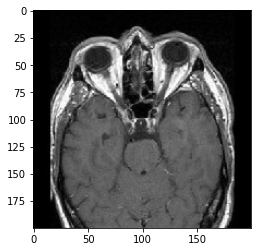

In [24]:
plt.imshow(x[0], cmap='gray')

# RESHAPING DATA

In [25]:
x_updated = x.reshape(len(x), -1)
x_updated.shape

(1222, 40000)

# SPLITTING DATA

In [26]:
xtrain, xtest, ytrain, ytest = train_test_split(x_updated, y, random_state=10, test_size=.20)

# FEATURE SCALING

In [27]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


# MODEL BUILDING<BR>
1) LOGISTIC REGRESSION<BR>
2) SVC

# LOGISTIC REGRESSION

In [28]:
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(xtrain, ytrain)
print("Training Score:", lg.score(xtrain, ytrain))
print("Testing Score:", lg.score(xtest, ytest))
y_pred = lg.predict(xtest)
print(classification_report(ytest, y_pred))

Training Score: 1.0
Testing Score: 0.9591836734693877
              precision    recall  f1-score   support

           0       0.97      0.90      0.94        81
           1       0.95      0.99      0.97       164

    accuracy                           0.96       245
   macro avg       0.96      0.94      0.95       245
weighted avg       0.96      0.96      0.96       245



# SVC

In [29]:
sv = SVC()
sv.fit(xtrain, ytrain)
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))
y_pred = sv.predict(xtest)
confusion_matrix(y_pred, ytest)
print(classification_report(ytest, y_pred))

Training Score: 0.9938587512794268
Testing Score: 0.963265306122449
              precision    recall  f1-score   support

           0       0.96      0.93      0.94        81
           1       0.96      0.98      0.97       164

    accuracy                           0.96       245
   macro avg       0.96      0.95      0.96       245
weighted avg       0.96      0.96      0.96       245



# DECISION TREE

In [30]:
dt = DecisionTreeClassifier()
dt.fit(xtrain, ytrain)
print("Training Score:", dt.score(xtrain, ytrain))
print("Testing Score:", dt.score(xtest, ytest))
y_pred = dt.predict(xtest)
print(classification_report(ytest, y_pred))

Training Score: 1.0
Testing Score: 0.9673469387755103
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        81
           1       0.98      0.98      0.98       164

    accuracy                           0.97       245
   macro avg       0.96      0.96      0.96       245
weighted avg       0.97      0.97      0.97       245



# RANDOM-FOREST CLASSIFIER

In [31]:
rf = RandomForestClassifier()
rf.fit(xtrain, ytrain)
print("Training Score:", rf.score(xtrain, ytrain))
print("Testing Score:", rf.score(xtest, ytest))
y_pred = rf.predict(xtest)
print(classification_report(ytest, y_pred))

Training Score: 1.0
Testing Score: 0.9795918367346939
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        81
           1       0.99      0.98      0.98       164

    accuracy                           0.98       245
   macro avg       0.97      0.98      0.98       245
weighted avg       0.98      0.98      0.98       245



# NAIVE BAYES

In [32]:
nb = GaussianNB()
nb.fit(xtrain, ytrain)
print("Training Score:", nb.score(xtrain, ytrain))
print("Testing Score:", nb.score(xtest, ytest))
y_pred = nb.predict(xtest)
print(classification_report(ytest, y_pred))

Training Score: 0.917093142272262
Testing Score: 0.9061224489795918
              precision    recall  f1-score   support

           0       0.90      0.80      0.85        81
           1       0.91      0.96      0.93       164

    accuracy                           0.91       245
   macro avg       0.91      0.88      0.89       245
weighted avg       0.91      0.91      0.90       245

